# Cálculo de integrales definidas

Se calculará la integral de sen(x) en medio período por métodos:

1. Éxito-fracaso
2. Media muestral

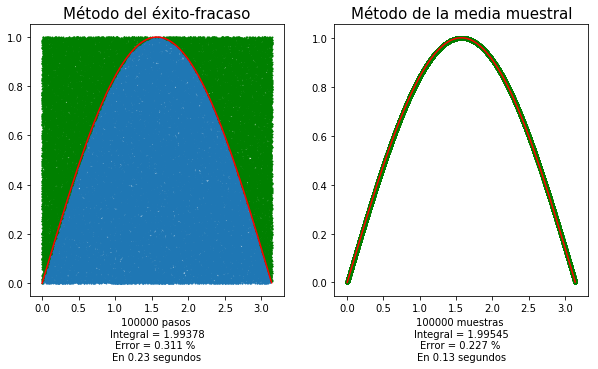

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time
# integral del seno entre 0 y pi

#grafico el seno para verlo
eje_x = np.arange(0,np.pi,.01)
seno = [np.sin(eje_x[i]) for i in range(len(eje_x))]
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.plot(eje_x,seno, 'r')


# calculo integral con método de éxito fracaso
N = 1e5 # número de puntos

start = time()
ex_x = [] # posición de éxitos
ex_y = []
fra_x = []# posición de fracasos
fra_y = []
for i in range(int(N)):
    x = np.pi*np.random.rand()
    y = np.random.rand()
    if y <= np.sin(x):
        ex_x.append(x)
        ex_y.append(y)
    else:
        fra_x.append(x)
        fra_y.append(y)
        
exitos = len(ex_x)
integral = np.pi*exitos/N
tiempo_exfra = time() - start
pasos = str(int(N)) + ' pasos \n' 
resultado =  'Integral = ' + str(round(integral,5)) + '\n'
err = 'Error = ' + str(round(100*abs(integral-2)/2,3)) + ' % \n'
tiempo = 'En ' + str(round(tiempo_exfra,2)) + ' segundos'
texto_exito_fracaso = pasos + resultado + err + tiempo
ax1.scatter(ex_x,ex_y, s=1)
ax1.set_xlabel(texto_exito_fracaso)
ax1.set_title('Método del éxito-fracaso', fontsize=15)
ax1.scatter(fra_x,fra_y, c='g', s=1)


# calculo integral por método de media muestral
start = time()
valores = np.pi*np.random.rand(int(N))
funcion_valuada = [np.sin(valores[i]) for i in range(len(valores))]
sumatoria = sum(funcion_valuada)
media_muestral = sumatoria/int(N)

inte = np.pi*media_muestral
fin = time() - start
ax2.plot(eje_x,seno, 'r')
ax2.scatter(valores, funcion_valuada, c='g', s = 6)
ax2.set_title('Método de la media muestral', fontsize=15)
medmuest = str(int(N)) + ' muestras \n'
resultado = 'Integral = ' + str(round(inte,5)) + '\n'
err = 'Error = ' + str(round(100*abs(inte-2)/2,3)) + ' % \n'
tiempo = 'En ' + str(round(fin,2)) + ' segundos'
xlabel = medmuest + resultado + err + tiempo
ax2.set_xlabel(xlabel)
plt.show()